In [ ]:
import os
import sys
import cv2
import numpy as np
import time
from ultralytics import YOLO

In [2]:
# load the YOLOv8 model
model = YOLO('my_model.pt')  # Load a model

In [4]:
# Run batched inference on a list of images
results = model("images/5fa92486a4eed_jpeg_jpg.rf.2fad785a5167b3548d2a820b73f40d2a.jpg")  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg") 


image 1/1 d:\D\learning resource\books, video, Software\engineering\machine learning books\projects\intermidit\bird-detection-and-tracking\images\5fa92486a4eed_jpeg_jpg.rf.2fad785a5167b3548d2a820b73f40d2a.jpg: 640x640 1 Bird, 540.1ms
Speed: 5.0ms preprocess, 540.1ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import cv2
import torch
from ultralytics import YOLO

try:
    model = YOLO('my_model.pt')  
except Exception as e:
    print(f"Error loading the model: {e}")
    exit()

ip_camera_url = "http://100.80.68.135:8080/video"  


cap = cv2.VideoCapture(ip_camera_url)

if not cap.isOpened():
    print(f"Error: Could not open video stream from {ip_camera_url}. "
          "Make sure your phone's IP camera app is running and the URL is correct.")
    exit()

print("Starting real-time prediction. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame. Check the video stream.")
        break
    try:
        results = model(frame)

        for result in results:
            boxes = result.boxes.cpu().numpy()  # Move to CPU for OpenCV
            for box in boxes:
                xyxy = box.xyxy[0].astype(int)
                confidence = box.conf[0]
                class_id = int(box.cls[0])
                label = f'Bird: {confidence:.2f}'
                cv2.rectangle(frame, xyxy[:2], xyxy[2:], (0, 255, 0), 2)  # Green bounding box
                cv2.putText(frame, label, (xyxy[0], xyxy[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        cv2.imshow('Real-time Bird Detection', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    except Exception as e:
        print(f"Error during inference: {e}")
        break
cap.release()
cv2.destroyAllWindows()
print("Exiting.")

# Insert your image


0: 640x640 7 Birds, 566.5ms
Speed: 11.3ms preprocess, 566.5ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


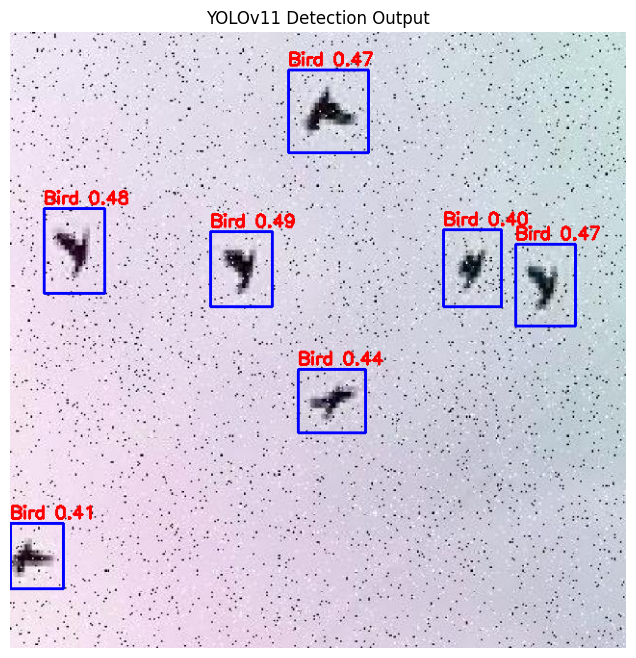

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("my_model.pt")  


img_path = "images/9cf764ffa58e7a61dda71fd572f52379-bird-flying-blue-skies_jpg.rf.2fe437eb51696f38c135ffef90bdbdb7.jpg" 
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = model(img_rgb)[0]

for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    label = f"{model.names[int(box.cls[0])]} {conf:.2f}" if model.names else f"{conf:.2f}"
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(img_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)


plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("YOLOv11 Detection Output")
plt.show()
